# Analysing Iris Datasets

This notebook walk through the Data analysis of [Iris Dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set) in python

Steps are as follows
* Download the data
* Load the data from CSV
* Explore the data via statistics and plots
* Implement Learning algorithm via scikit-learn package

### 1. Setup

In [309]:
#plot graphs inline 
%matplotlib inline

#import required packages
import urllib.request
import shutil
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from  matplotlib import gridspec
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### 2. Acquire data

In [310]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
file_path ='C:\\Users\\Pavan\\Work\\LearnML\\_data\\irisdataset\\iris.data'

with urllib.request.urlopen(url) as response, open(file_path, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

### 3.  Load the Data

In [311]:
#read data from csv file
data = pd.read_csv(file_path,
                   sep=',',
                   header=None,
                   names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#read sample rows
print(data.head(5))
print("\n")
print(data.tail(5))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


     sepal_length  sepal_width  petal_length  petal_width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


### 4. Explore the dataset

In [312]:
#read shape
print("Shape of data (rows,columns) : {0} ".format((data.shape)))
print("\n")
#Summary Statistics of columns
print(data.describe())

Shape of data (rows,columns) : (150, 5) 


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


#### Plot the graphs for exploration

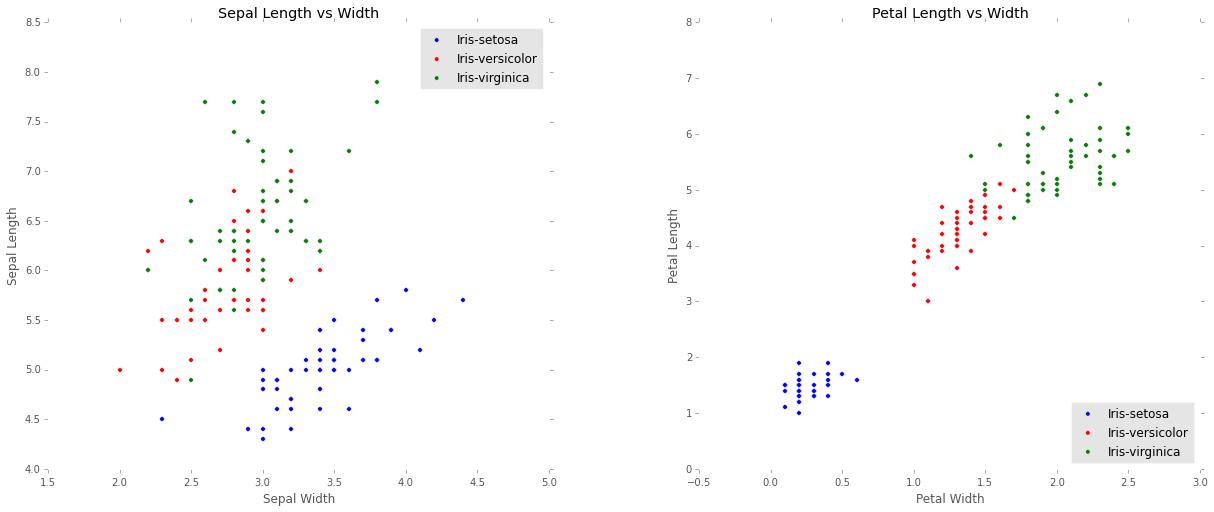

In [313]:
#graph layout
fig = plt.figure(figsize=[16,8])
gs = gridspec.GridSpec(1, 2)
gs.update(left=1, right=2, wspace=0.3)
sepal_ax = fig.add_subplot(gs[0])
petal_ax = fig.add_subplot(gs[1])
style.use('ggplot')


#Generate subsets for each class
iris_setosa=data.loc[data['class'] == 'Iris-setosa']
iris_versicolor=data.loc[data['class'] == 'Iris-versicolor']
iris_virginica=data.loc[data['class'] == 'Iris-virginica']

#Plot Sepal Width vs Length
sepal_ax.scatter(iris_setosa['sepal_width'],iris_setosa['sepal_length'],c='Blue',label='Iris-setosa')
sepal_ax.scatter(iris_versicolor['sepal_width'],iris_versicolor['sepal_length'],c='Red',label='Iris-versicolor')
sepal_ax.scatter(iris_virginica['sepal_width'],iris_virginica['sepal_length'],c='Green',label='Iris-virginica')
                        
sepal_ax.set_title('Sepal Length vs Width')
sepal_ax.set_ylabel('Sepal Length')
sepal_ax.set_xlabel('Sepal Width')
sepal_ax.legend(scatterpoints=1,loc='upper right')

#Plot Petal Width vs Length
petal_ax.scatter(iris_setosa['petal_width'],iris_setosa['petal_length'],c='Blue',label='Iris-setosa')
petal_ax.scatter(iris_versicolor['petal_width'],iris_versicolor['petal_length'],c='Red',label='Iris-versicolor')
petal_ax.scatter(iris_virginica['petal_width'],iris_virginica['petal_length'],c='Green',label='Iris-virginica')
                           
petal_ax.set_title('Petal Length vs Width')
petal_ax.set_ylabel('Petal Length')
petal_ax.set_xlabel('Petal Width')
petal_ax.legend(scatterpoints=1,loc='lower right')

 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D3F6A20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001DC20550>]], dtype=object)

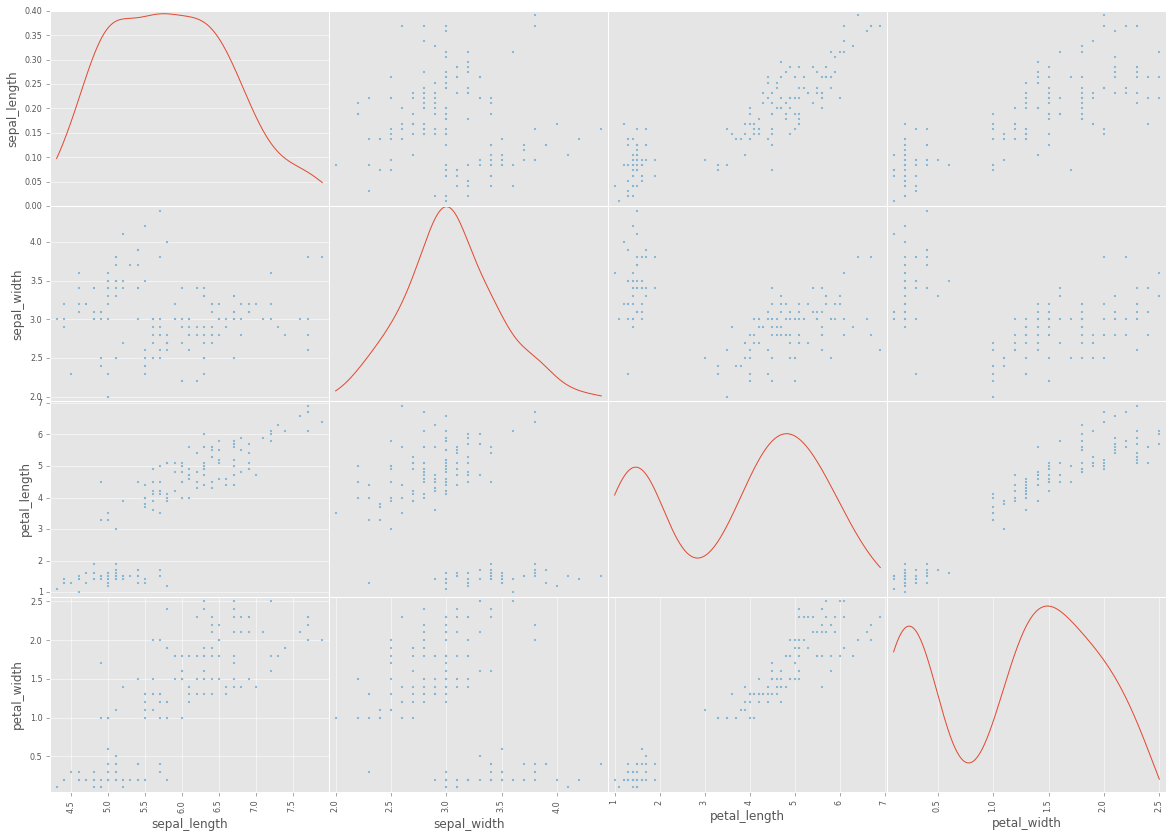

In [314]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data,alpha=1.0,figsize=(20,14), diagonal='kde')

### 5. Prepare train and test sets

In [315]:
rowcount=len(data.index)
traincount=math.floor(rowcount*0.75)
trainindex=np.random.choice(data.index.values, traincount)
train_data = data.ix[trainindex]
test_data =data.drop(trainindex)

print("Total instances in train set is : {0}".format(len(train_data.index)))
print("Total instances in test set is : {0}".format(len(test_data.index)))
print("\n")
print(train_data.head(5))
print("\n")
print(test_data.head(5))

Total instances in train set is : 112
Total instances in test set is : 74


     sepal_length  sepal_width  petal_length  petal_width            class
93            5.0          2.3           3.3          1.0  Iris-versicolor
136           6.3          3.4           5.6          2.4   Iris-virginica
122           7.7          2.8           6.7          2.0   Iris-virginica
127           6.1          3.0           4.9          1.8   Iris-virginica
142           5.8          2.7           5.1          1.9   Iris-virginica


   sepal_length  sepal_width  petal_length  petal_width        class
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa


#### Shape the Data for modelling

In [316]:
#create array for features
train_features = train_data[['sepal_length','sepal_width','petal_width','petal_length']].values
test_features = test_data[['sepal_length','sepal_width','petal_width','petal_length']].values

#create vector of target class,and convert class to a categorical code
train_target=pd.Categorical.from_array(train_data['class']).codes
test_target=pd.Categorical.from_array(test_data['class']).codes
 
print('train features is of data type : {0}'.format(type(train_features)))
print('train target is of data type : {0}'.format(type(train_target)))


train features is of data type : <class 'numpy.ndarray'>
train target is of data type : <class 'numpy.ndarray'>


### 6. Build Model and Predict

#### Model with Random Forest Decision tree

In [317]:
# Create the random forest object which will include all the parameters
forest = RandomForestClassifier(n_estimators = 100)

#train the forest with training data
forest = forest.fit(train_features,train_target)

#use the model to predict test data outcomes
output = forest.predict(test_features)

#### Assess Random Forest Model

In [318]:
#Model Metrics
accuracy = metrics.accuracy_score(test_target,output)
precision = metrics.precision_score(test_target,output)
recall = metrics.recall_score(test_target,output)

print("Accuracy : {0}".format(accuracy))
print("Precision : {0}".format(precision))
print("Recall : {0}".format(recall))

Accuracy : 0.9324324324324325
Precision : 0.9329881829881831
Recall : 0.9324324324324325


Confusion Matrix : 
 [[31  0  0]
 [ 0 19  2]
 [ 0  3 19]] 


([<matplotlib.axis.YTick at 0x1baf0a20>,
 <a list of 3 Text yticklabel objects>)

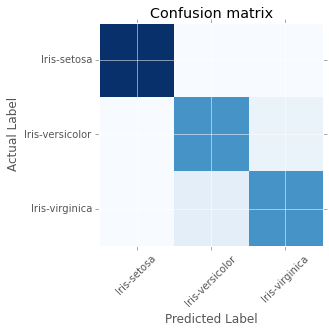

In [319]:
#generate confusion matrix
conf = metrics.confusion_matrix(test_target,output)
print("Confusion Matrix : \n {0} ".format(conf))

#visualise Confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

tick_marks = np.arange(len(data['class'].unique()))
plt.xticks(tick_marks, data['class'].unique(), rotation=45)
plt.yticks(tick_marks,data['class'].unique())